In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
import pylab as py
from scipy.stats import probplot
import scipy.stats as st

warnings.filterwarnings(action='ignore')

In [2]:
df_red = pd.read_csv("./data/winequality-red(processed).csv", encoding='utf-8')
df_white = pd.read_csv("./data/winequality-white(processed).csv")

In [5]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df_red['free sulfur dioxide'].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [12]:
df_red['free sulfur dioxide'].median()

14.0

In [13]:
from scipy.stats import describe
X = df_red['free sulfur dioxide']
describe(X)

DescribeResult(nobs=1599, minmax=(1.0, 72.0), mean=15.874921826141339, variance=109.414883833059, skewness=1.249393847434253, kurtosis=2.01348999733378)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

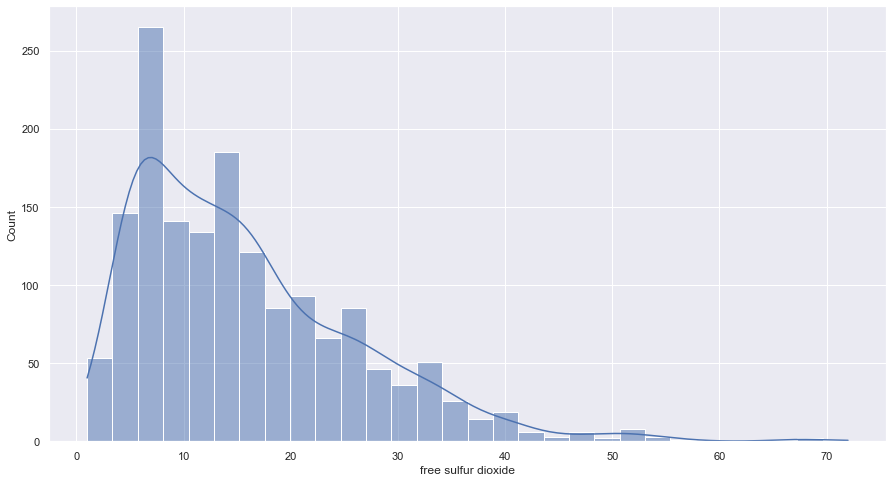

In [10]:
sns.histplot(df_red['free sulfur dioxide'], kde=True)

## Standardization

In [18]:
X

0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
5       13.0
6       15.0
7       15.0
8        9.0
9       17.0
10      15.0
11      17.0
12      16.0
13       9.0
14      52.0
15      51.0
16      35.0
17      16.0
18       6.0
19      17.0
20      29.0
21      23.0
22      10.0
23       9.0
24      21.0
25      11.0
26       4.0
27      10.0
28      14.0
29       8.0
30      17.0
31      22.0
32      15.0
33      40.0
34      13.0
35       5.0
36       3.0
37      13.0
38       7.0
39      12.0
40      12.0
41      17.0
42       8.0
43       9.0
44       5.0
45       8.0
46      22.0
47      12.0
48       5.0
49      12.0
50       4.0
51       8.0
52       6.0
53      30.0
54      33.0
55      25.0
56       4.0
57      50.0
58      17.0
59       9.0
60      19.0
61      20.0
62      12.0
63      13.0
64       4.0
65       4.0
66      11.0
67       6.0
68      27.0
69       8.0
70      15.0
71      17.0
72      18.0
73      11.0
74      28.0
75       9.0
76       9.0

In [21]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_standardScaled = standardScaler.fit_transform(np.array(X).reshape(-1, 1))

In [22]:
np.array(X).reshape(-1, 1)

array([[11.],
       [25.],
       [15.],
       ...,
       [29.],
       [32.],
       [18.]])

In [23]:
X_standardScaled

array([[-0.46619252],
       [ 0.87263823],
       [-0.08366945],
       ...,
       [ 1.2551613 ],
       [ 1.54205361],
       [ 0.20322286]])

In [28]:
st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)) 

(15.361834689650543, 16.388008962632135)

<AxesSubplot:>

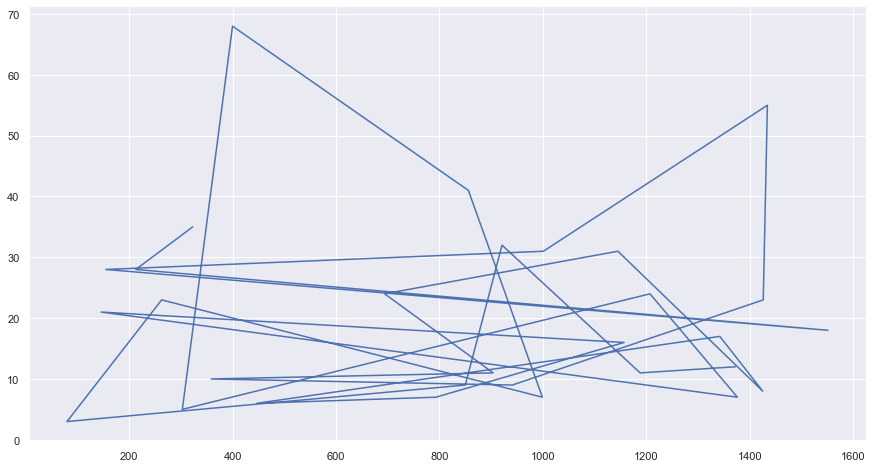

In [33]:
X.sample(30).plot()

In [61]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [64]:
m

array([-0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252,
       -0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252,
       -0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252,
       -0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252,
       -0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252,
       -0.46619252, -0.46619252, -0.46619252, -0.46619252, -0.46619252])

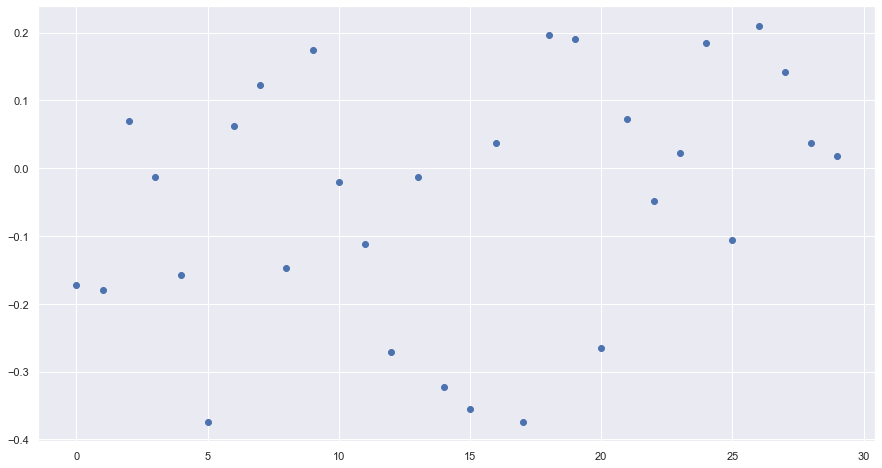

In [70]:
sample_mean = []
for i in range(0, 30):
    np.random.seed(i)
    x = np.random.choice(X_standardScaled.reshape(1, -1)[0].tolist(), 30)
    sample_mean.append(x.mean())
time = np.array(np.arange(30))
m = np.array(sample_mean)
plt.errorbar(time, m, fmt='bo')
plt.show()

# 연습문제

## 1

In [72]:
experiment = np.arange(1,21)
count = np.array([10,12,20,14,17,20,14,13,11,17,21,11,16,14,17,2,0,1,7,2])
A=np.tile('A',8)
B=np.tile('B',7)
C=np.tile('C',5)
spray=np.concatenate((A,B,C),axis=0)

In [73]:
spray

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'C', 'C', 'C', 'C'], dtype='<U1')

In [74]:
df = pd.DataFrame({'count':count, 'spray':spray})

In [76]:
df

,count,spray
0,10,A
1,12,A
2,20,A
3,14,A
4,17,A
5,20,A
6,14,A
7,13,A
8,11,B
9,17,B


In [80]:
#(a)
df.groupby('spray').count()

,count
spray,
A,8
B,7
C,5


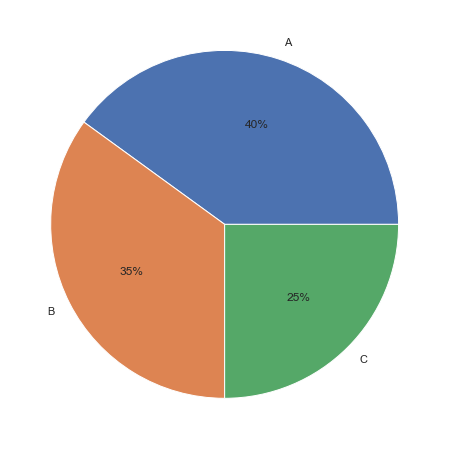

In [85]:
plt.pie(x=df.groupby('spray').count()['count'],
        labels=df.groupby('spray').count().index,
        autopct='%.0f%%')
plt.show()

In [87]:
#(b)
df.describe()

,count
count,20.000000
mean,11.950000
std,6.525053
min,0.000000
25%,9.250000
50%,13.500000
75%,17.000000
max,21.000000


In [88]:
#(c)
df.groupby('spray').sum()

,count
spray,
A,120
B,107
C,12


## 2

In [89]:
river=np.array([735,320,325,392,524,450,1459,135,465,600,330,336,280,
               315,870,906,202,329,290,1000,600,505,1450,840,1243,890,
               350,407,286,280])

In [92]:
#(a)
print(np.mean(river), np.median(river))

570.4666666666667 428.5


In [93]:
#(b)
pd.DataFrame(river).describe()

,0
count,30.000000
mean,570.466667
std,359.984457
min,135.000000
25%,321.250000
50%,428.500000
75%,813.750000
max,1459.000000


In [96]:
#(c)
np.percentile(river, q=[15, 45, 80])

array([287.4 , 392.75, 874.  ])

<AxesSubplot:ylabel='Count'>

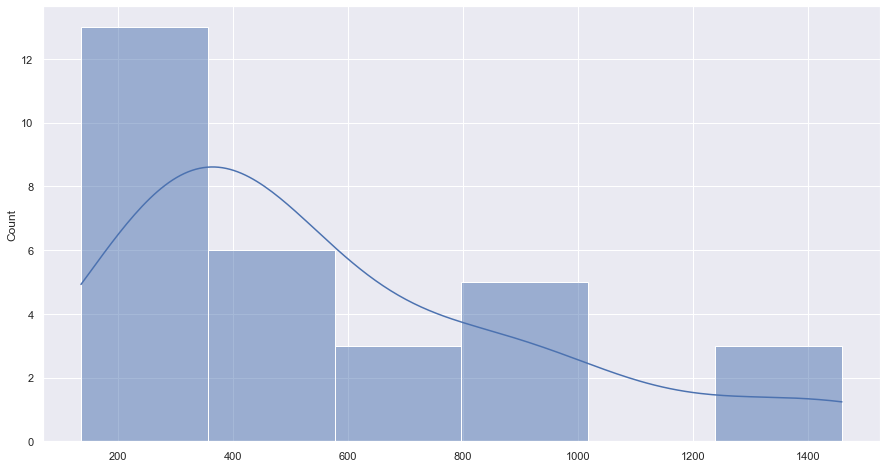

In [98]:
#(d)
sns.histplot(river, kde=True)

<AxesSubplot:>

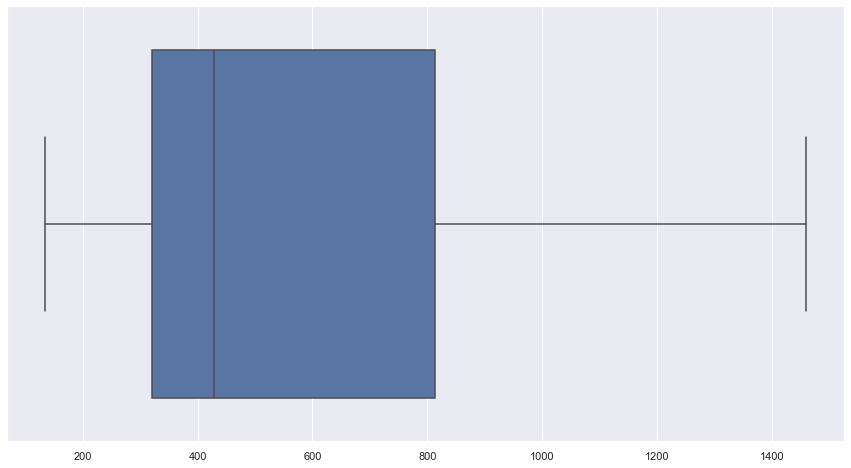

In [99]:
sns.boxplot(river)

## 3

In [100]:
bulb=np.array([25,16,44,62,36,58,38])

In [102]:
#(a), (b), (c)
pd.DataFrame(bulb).describe()

,0
count,7.000000
mean,39.857143
std,16.557260
min,16.000000
25%,30.500000
50%,38.000000
75%,51.000000
max,62.000000


<AxesSubplot:>

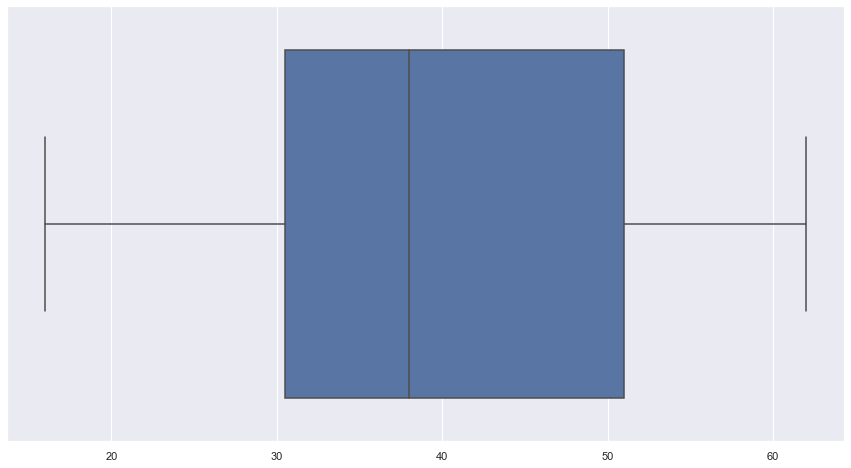

In [103]:
#(d)
sns.boxplot(bulb)

<AxesSubplot:>

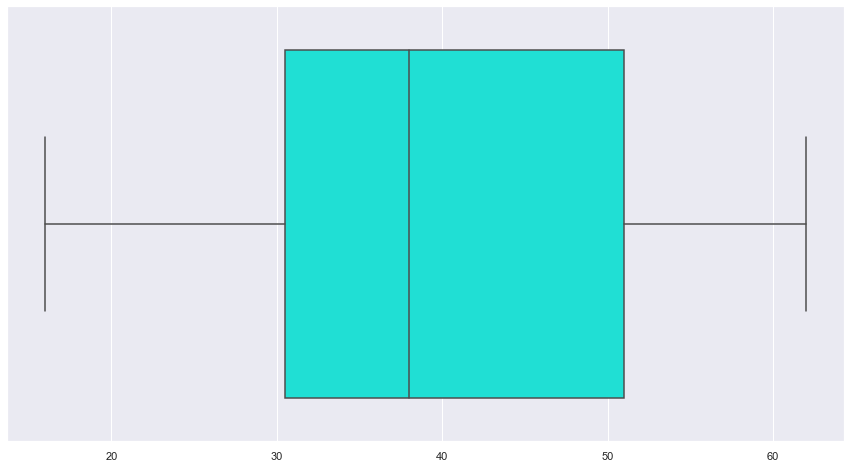

In [107]:
#(e)
sns.boxplot(bulb, palette="hsv_r")

In [110]:
#(f)
# !pip install stemgraphic
import stemgraphic

(<Figure size 540x162 with 1 Axes>, <Axes:>)

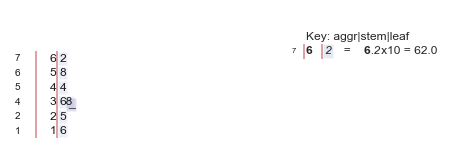

In [111]:
stemgraphic.stem_graphic(bulb)

In [112]:
bulb

array([25, 16, 44, 62, 36, 58, 38])

## 4

In [116]:
x = st.norm.rvs(0, 1, 30)

In [117]:
#(a)
print(np.mean(x), np.std(x))

-0.0036087047399417428 1.0674415710346499


In [118]:
#(b)
st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)) 

(-0.4090119227496146, 0.40179451326973115)

## 5

In [120]:
data1=np.array([19,21,15,23,24,15,15,15,16,29,
               18,32,20,23,24,24,25,25,25,25,
               25,25,25,36,26,28,30])

In [122]:
#(a), (b)
pd.DataFrame(data1).describe()

,0
count,27.000000
mean,23.259259
std,5.396527
min,15.000000
25%,19.500000
50%,24.000000
75%,25.000000
max,36.000000


<AxesSubplot:ylabel='Count'>

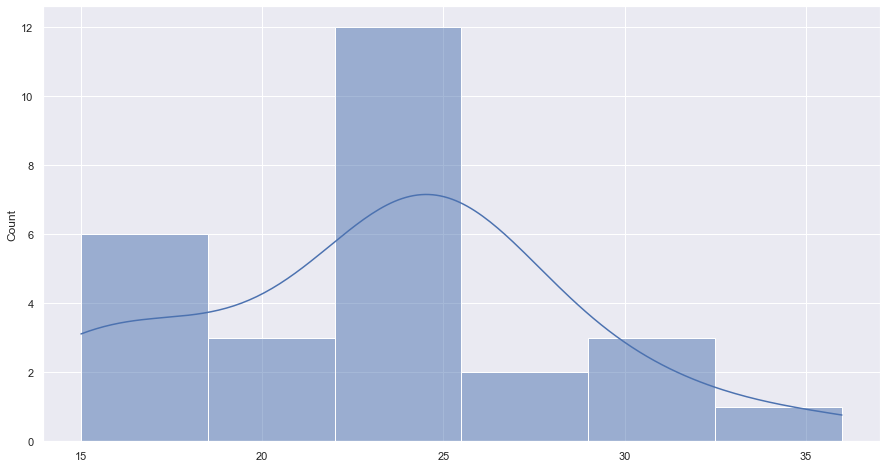

In [124]:
#(c)
sns.histplot(data1, kde=True)

In [136]:
#(d)
p1 = data1[data1 < 20]
p2 = data1[np.where((data1>=20)&(data1<30))]
p3 = data1[data1 >= 30]

In [128]:
p1

array([21, 23, 24, 29, 32, 23, 24, 24, 25, 25, 25, 25, 25, 25, 25, 36, 26,
       28, 30])

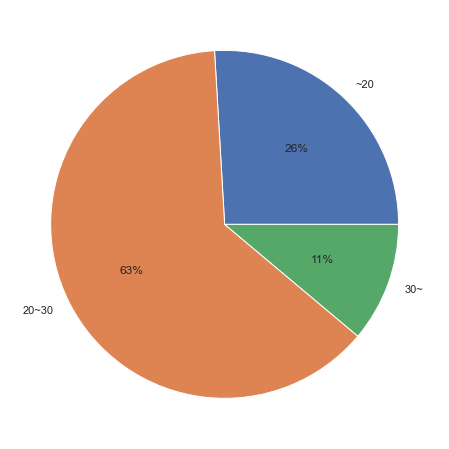

In [140]:
plt.pie(x=[len(p1), len(p2), len(p3)],
        labels=['~20', '20~30', '30~'],
        autopct='%.0f%%')
plt.show()

## 6

In [141]:
data=[2.3,2.4,3.1,2.2,1.0,2.3,2.1,1.1,1.2,0.9,1.5,1.1]

In [142]:
#(a),(b)
pd.DataFrame(data).describe()

,0
count,12.000000
mean,1.766667
std,0.717741
min,0.900000
25%,1.100000
50%,1.800000
75%,2.300000
max,3.100000


In [143]:
#(c)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(1.310636069846852, 2.2226972634864812)

<AxesSubplot:>

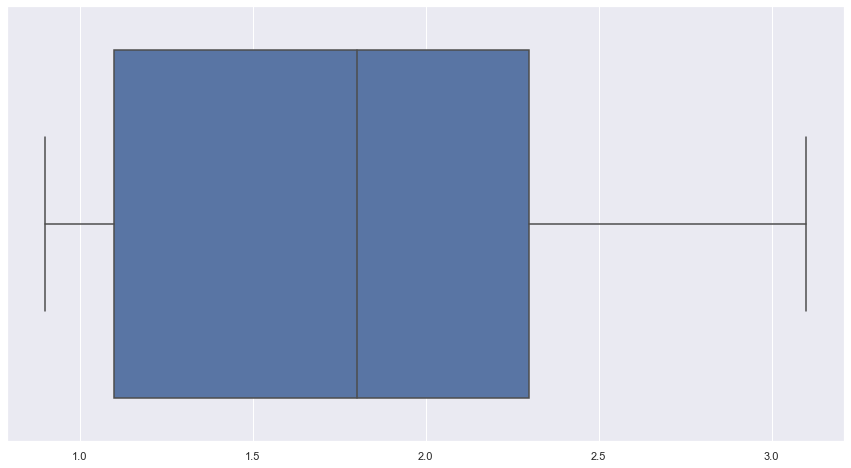

In [144]:
#(d)
sns.boxplot(data)

(<Figure size 540x180 with 1 Axes>, <Axes:>)

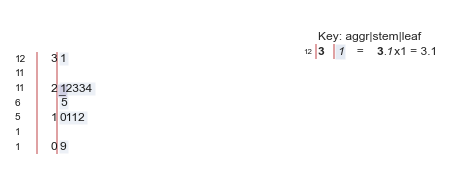

In [145]:
#(e)
stemgraphic.stem_graphic(data)

## 7

In [146]:
smoke=np.array(['y','y','n','n'])
wrinkle=np.array(['y','n','y','n'])
freq=np.array([60,10,30,40])
df=pd.DataFrame({'smoke':smoke, 'wrinkle':wrinkle,'freq':freq}); df

,smoke,wrinkle,freq
0,y,y,60
1,y,n,10
2,n,y,30
3,n,n,40


In [151]:
#(a)
df2 = df[df.smoke == 'y']
p1 = df2[df2.wrinkle == 'y'].freq.sum() / df2.freq.sum()
p1

0.8571428571428571

In [154]:
#(b)
df3 = df[df.smoke == 'n']
p2 = df3[df3.wrinkle == 'y'].freq.sum() / df3.freq.sum()
p2

0.42857142857142855

In [153]:
#(c)
np.abs(p2-p1)

0.42857142857142855

In [157]:
df2.freq

0    60
1    10
Name: freq, dtype: int64

In [158]:
df2

,smoke,wrinkle,freq
0,y,y,60
1,y,n,10


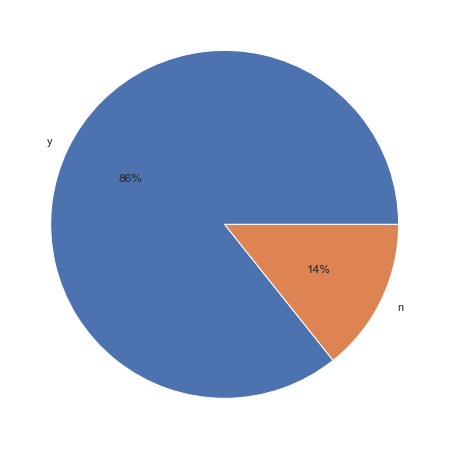

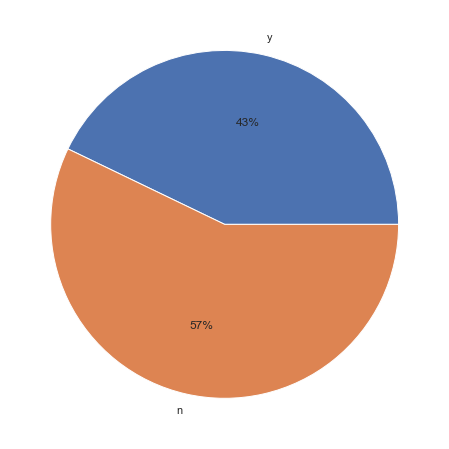

In [161]:
#(d)
plt.pie(x=df2.freq,
        labels=['y', 'n'],
        autopct='%.0f%%')
plt.show()

plt.pie(x=df3.freq,
        labels=['y', 'n'],
        autopct='%.0f%%')
plt.show()

## 8

In [162]:
tv=[5.7,6.7,6.8,7.9,10.6,11.3,9.8,8.4,8.3,9.5,6.7,6.9,9.8,8.8,12.1,10.2,9.5,9.4,9.3,5.9]

In [163]:
#(a)
np.mean(tv)

8.680000000000001

In [169]:
#(b)
st.t.interval(alpha=0.95, df=len(tv)-1, loc=np.mean(tv), scale=st.sem(tv)) 

(7.839272675257288, 9.520727324742715)

In [170]:
#(c)
pd.DataFrame(tv).describe()

,0
count,20.000000
mean,8.680000
std,1.796371
min,5.700000
25%,6.875000
50%,9.050000
75%,9.800000
max,12.100000


<AxesSubplot:>

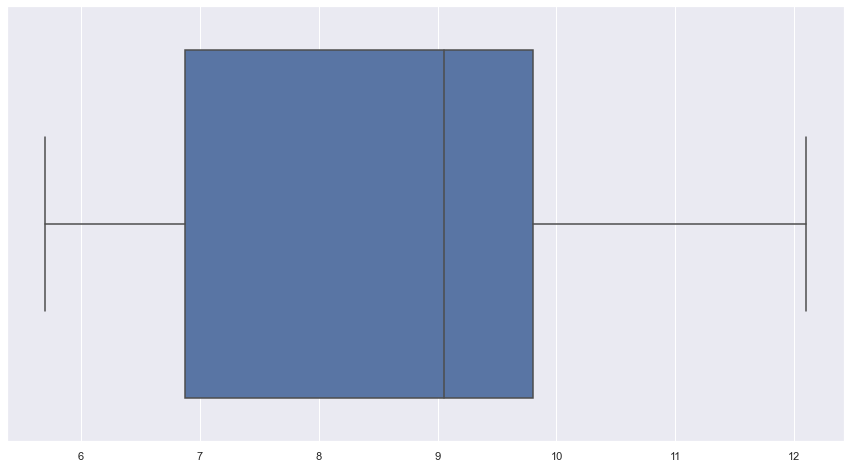

In [171]:
#(d)
sns.boxplot(tv)

<AxesSubplot:ylabel='Count'>

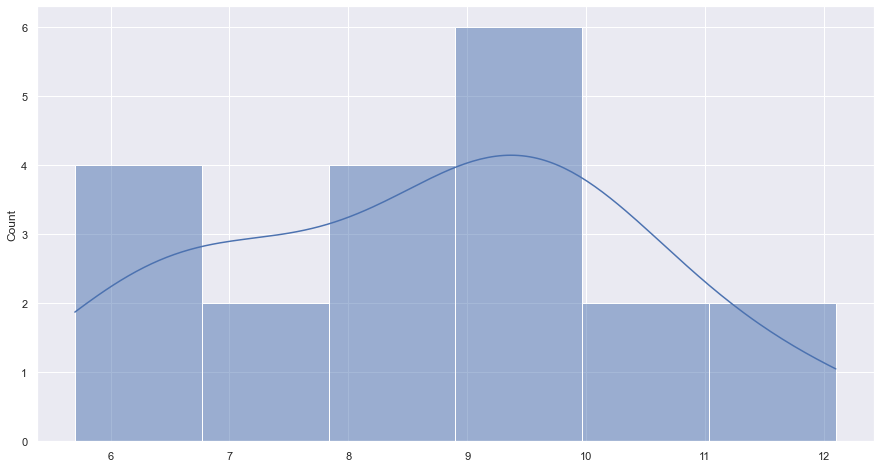

In [172]:
#(e)
sns.histplot(tv, kde=True)

## 9

In [173]:
phone=[20870,39400,65000,45000,35890,29000,56770,
      23000,38550,59800,39880,56780,35200,48990]

In [174]:
#(a)(c)
pd.DataFrame(phone).describe()

,0
count,14.000000
mean,42437.857143
std,13646.141285
min,20870.000000
25%,35372.500000
50%,39640.000000
75%,54825.000000
max,65000.000000


In [175]:
#(b)
st.t.interval(alpha=0.95, df=len(phone)-1, loc=np.mean(phone), scale=st.sem(phone)) 

(34558.80974033922, 50316.90454537507)

<AxesSubplot:>

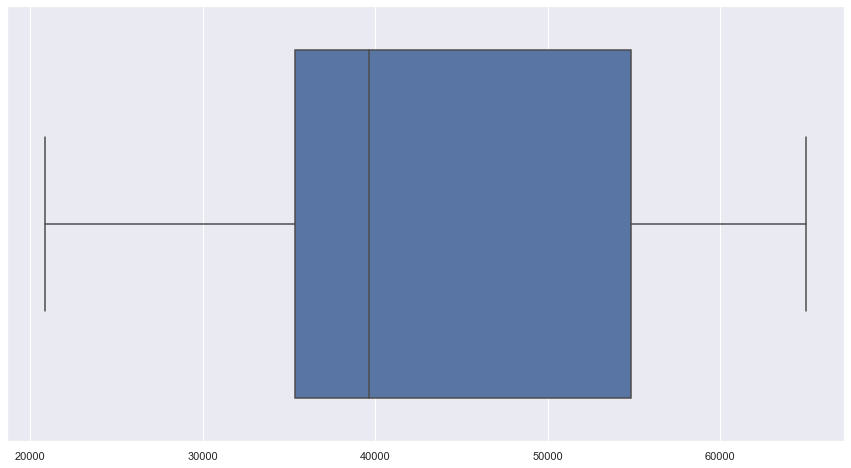

In [176]:
#(d)
sns.boxplot(phone)

<AxesSubplot:ylabel='Count'>

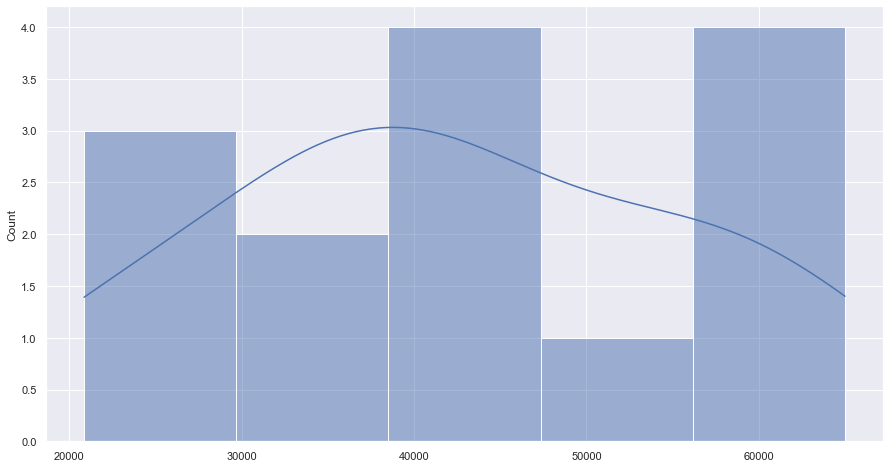

In [177]:
sns.histplot(phone, kde=True)

## 11

In [178]:
sleep=[5.6,7.8,6.5,7.2,6.9,7.3,5.8,7.5,8.2,7.8]

In [180]:
#(a)(c)
pd.DataFrame(sleep).describe()

,0
count,10.000000
mean,7.060000
std,0.864356
min,5.600000
25%,6.600000
50%,7.250000
75%,7.725000
max,8.200000


In [181]:
#(b)
st.t.interval(alpha=0.95, df=len(sleep)-1, loc=np.mean(sleep), scale=st.sem(sleep)) 

(6.4416770421841285, 7.678322957815871)

<AxesSubplot:>

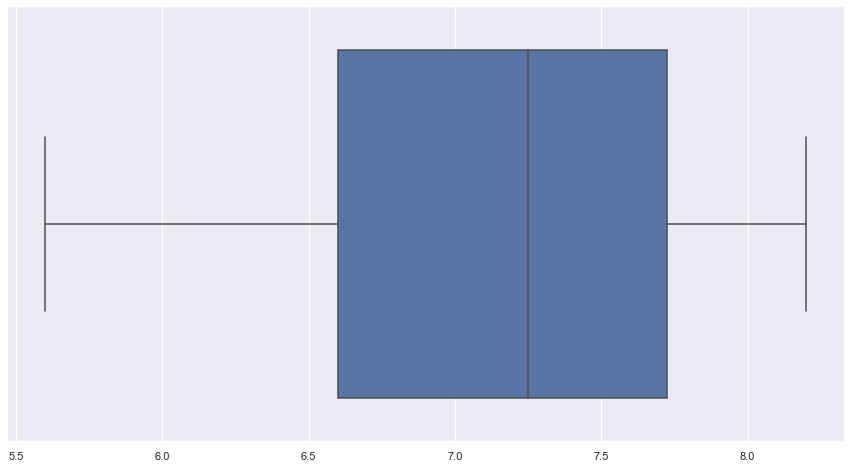

In [182]:
#(d)
sns.boxplot(sleep)

In [183]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
sleep_standardScaled = standardScaler.fit_transform(np.array(sleep).reshape(-1, 1))

In [184]:
sleep_standardScaled

array([[-1.7804878 ],
       [ 0.90243902],
       [-0.68292683],
       [ 0.17073171],
       [-0.19512195],
       [ 0.29268293],
       [-1.53658537],
       [ 0.53658537],
       [ 1.3902439 ],
       [ 0.90243902]])

<AxesSubplot:>

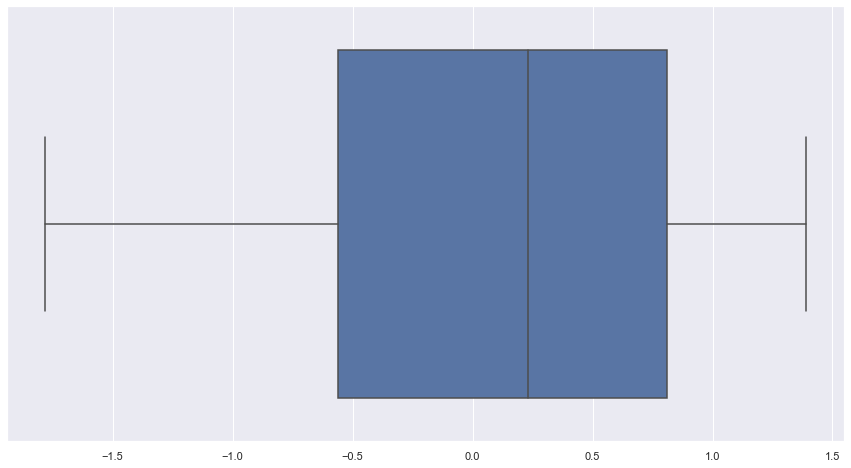

In [185]:
sns.boxplot(sleep_standardScaled)